# Imports

In [159]:
import keras #High level interface of TensorFlow
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import InputLayer
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
from PIL import Image

# Image preprocessing

In [160]:
train_path='../dataset2/train'
valid_path='../dataset2/valid'

In [161]:
batch_size = 16 #Every batch contains data from 16 different images 
#Data Augmentation
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),  
        batch_size=batch_size,)  
valid_set = train_datagen.flow_from_directory(
        valid_path,
        target_size=(150, 150),  
        batch_size=batch_size,)  


Found 1180 images belonging to 12 classes.
Found 438 images belonging to 12 classes.


# Creating a model

In [162]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #first block, frozen

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Flatten()) #Stream data to "nodes" of the ANN
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #Dropping out some data
model.add(Dense(12))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_56 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_57 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [125]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training

In [126]:
model.fit_generator(train_set,
                    steps_per_epoch = 1180//batch_size, #1000/16 numbers of batches per epoch
                    epochs = 5,
                    validation_data = valid_set,
                    validation_steps = 462//16 )
                   
        
                 

Epoch 1/5
73/73 [==============================] - 46s 630ms/step - loss: 0.3556 - acc: 0.8827 - val_loss: 0.3691 - val_acc: 0.8798
Epoch 2/5
73/73 [==============================] - 45s 616ms/step - loss: 0.2720 - acc: 0.9201 - val_loss: 0.2767 - val_acc: 0.9199
Epoch 3/5
73/73 [==============================] - 46s 625ms/step - loss: 0.2261 - acc: 0.9330 - val_loss: 0.2523 - val_acc: 0.9176
Epoch 4/5
73/73 [==============================] - 46s 626ms/step - loss: 0.2096 - acc: 0.9366 - val_loss: 0.2236 - val_acc: 0.9239
Epoch 5/5
73/73 [==============================] - 46s 631ms/step - loss: 0.1884 - acc: 0.9404 - val_loss: 0.2037 - val_acc: 0.9326


In [150]:
model.save("model.h5")
model.save_weights("model_weights.h5")

# Testing

In [142]:
valid_set.class_indices

{'Faces': 0,
 'accordion': 1,
 'brain': 2,
 'brontosaurus': 3,
 'buddha': 4,
 'butterfly': 5,
 'cougar_body': 6,
 'cougar_face': 7,
 'crab': 8,
 'crayfish': 9,
 'crocodile': 10,
 'soccer_ball': 11}

In [153]:
model_test = load_model("model.h5")
model_test.load_weights("model_weights.h5")

In [154]:
#preds = model.predict_generator(valid_set,79//16)

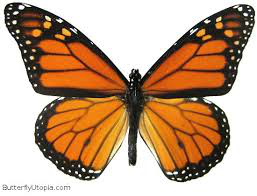

In [155]:
image = Image.open("PersonalTestSet/butterfly.jpg")
image

In [156]:
def preprocess_img(img,target_size):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    return img

In [157]:
preprocessed_image = preprocess_img(image,target_size=(150,150))

In [158]:
prediction = model_test.predict(preprocessed_image)
prediction

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)